# 4.10 Instacart Final Task

## Contents

 1. Import Libraries and Dataframes
 2. Create regional segmentation of data
 3. Determine whether there’s a difference in spending habits between the different U.S. regions
 4. Create an exclusion flag for low-activity customers
 5. Customer profiling
 6. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
 7. Compare customer profiles with regions and departments
 8. Visualizations

### 1. Importing libraries and Dataframes:

In [6]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [12]:
# assign path
path = r'C:\Users\User\Downloads\MM-2020 Instacart Basket Analysis'

In [13]:
# import dataframe
ords_prods_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

### 2. Create regional segmentation of data:

In [14]:
ords_prods_cust.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_spend', 'spender_flag', 'Customer_frequency',
       'frequency_flag', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

In [15]:
ords_prods_cust.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [16]:
# Assign Northeast Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Maine', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Hampshire', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Vermont', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Pennsylvania', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Massachusetts', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Rhode Island', 'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Connecticut', 'region'] = 'Northeast'

In [17]:
# Assign Midwest Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Wisconsin', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Michigan', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Illinois', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Indiana', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Ohio', 'region'] = 'Midwest'

In [18]:
# Assign Midwest Region2
ords_prods_cust.loc[ords_prods_cust['state'] == 'North Dakota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Dakota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Nebraska', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Kansas', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Minnesota', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Iowa', 'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Missouri', 'region'] = 'Midwest'

In [19]:
# Assign South Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Delaware', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Maryland', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'District of Columbia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Virginia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'West Virginia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'North Carolina', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'South Carolina', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Georgia', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Florida', 'region'] = 'South'

In [20]:
# Assign South Region2
ords_prods_cust.loc[ords_prods_cust['state'] == 'Kentucky', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Tennessee', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Mississippi', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Alabama', 'region'] = 'South'

In [21]:
# Assign South Region3
ords_prods_cust.loc[ords_prods_cust['state'] == 'Oklahoma', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Texas', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Arkansas', 'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Louisiana', 'region'] = 'South'

In [22]:
# Assign West Region
ords_prods_cust.loc[ords_prods_cust['state'] == 'Idaho', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Montana', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Wyoming', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Nevada', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Utah', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Colorado', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Arizona', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'New Mexico', 'region'] = 'West'

In [23]:
# Assign West Region2
ords_prods_cust.loc[ords_prods_cust['state'] == 'Alaska', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Washington', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Oregon', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'California', 'region'] = 'West'
ords_prods_cust.loc[ords_prods_cust['state'] == 'Hawaii', 'region'] = 'West'

In [24]:
ords_prods_cust.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
2,2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast
3,3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest
4,4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest


### 3. Determine whether there’s a difference in spending habits between the different U.S. regions: 

In [25]:
# Crosstab Region to spending flag
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spender_flag'], dropna = False)

In [26]:
crosstab.to_clipboard()

In [27]:
# save changes to ords_prods_cust
ords_prods_cust.to_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_customers_merged.pkl'))

### 4. Create an exclusion flag for low-activity customers (Customers with less than 5 orders):

In [28]:
# Create a flag for customers with less than 5 orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [29]:
ords_prods_cust['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    15342287
low-activity customer       721107
Name: count, dtype: int64

In [30]:
# Exclude low-activity customers from the dataframe
df_excluded = ords_prods_cust[ords_prods_cust['activity_flag'] != 'low-activity customer']

In [31]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, 'Data','Prepared Data', 'low_activity_excluded.pkl'))

### 5. Customer profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. Then create images:

#### Income:

In [32]:
# Create an income group variable
df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['income'] > 55000) & (df_excluded['income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['income'] > 150000, 'income_group'] = 'high-income'

C:\Users\User\AppData\Local\Temp\ipykernel_3776\1030381792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'


In [33]:
# Check the counts of income groups
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    11185253
low-income        2230519
high-income       1926515
Name: count, dtype: int64

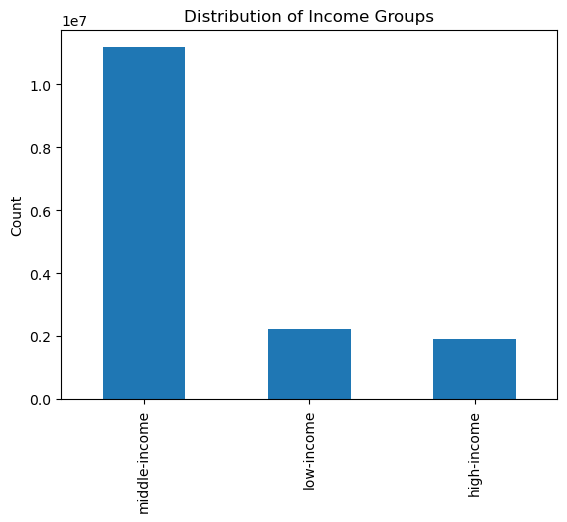

In [34]:
# Make a bar chart showing the distribution of income groups
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [36]:
# Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_distribution_bar.png'))

#### Age:

In [37]:
# Create an age group variable
df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['age'] > 44) & (df_excluded['age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['age'] > 64, 'age_group'] = 'senior'

C:\Users\User\AppData\Local\Temp\ipykernel_3776\2854730798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'


In [38]:
# Check value counts for each age group
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    4794149
adult          4564750
senior         4063574
young adult    1919814
Name: count, dtype: int64

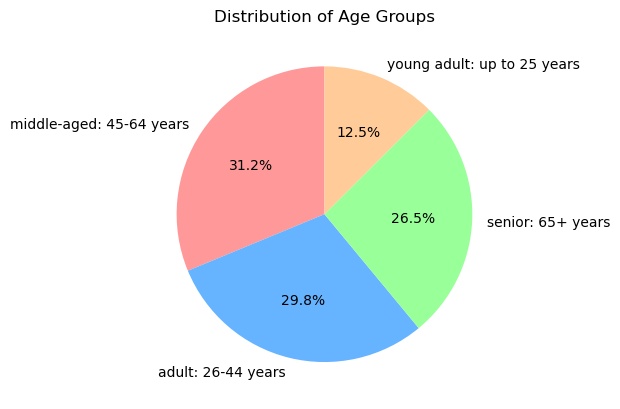

In [39]:
# Make a pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [40]:
# Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_group_distribution_pie.png'))

#### Dependants:

In [41]:
# Create a dependents flag
df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['n_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

C:\Users\User\AppData\Local\Temp\ipykernel_3776\2552754020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [42]:
# Check value counts
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    11506233
no dependants      3836054
Name: count, dtype: int64

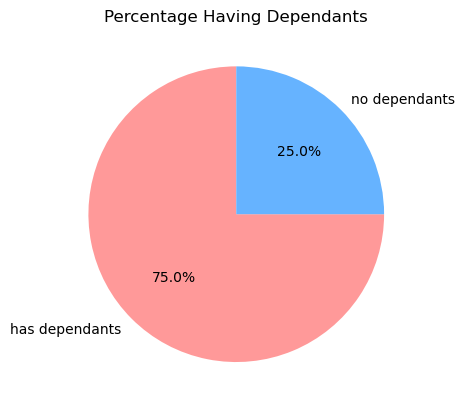

In [43]:
# Make a pie chart showing the percentage of dependants
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

In [44]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, 'Data','Prepared Data', 'low_activity_excluded.pkl'))

In [ ]:
# import dataframe
df_excluded = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_excluded.pkl'))

In [46]:
list(df_excluded.columns.values)

['Unnamed: 0',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spender_flag',
 'Customer_frequency',
 'frequency_flag',
 'first_name',
 'surname',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 '_merge',
 'region',
 'activity_flag',
 'income_group',
 'age_group',
 'dependants_flag']

#### Loyalty vs Age group:

In [47]:
# Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna = False)
loyalty_age_cross

age_group,adult,middle-aged,senior,young adult
loyalty_flag,,,,
Loyal customer,1515145,1600607,1358054,638832
New customer,702490,743934,629827,295426
Regular customer,2347115,2449608,2075693,985556


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

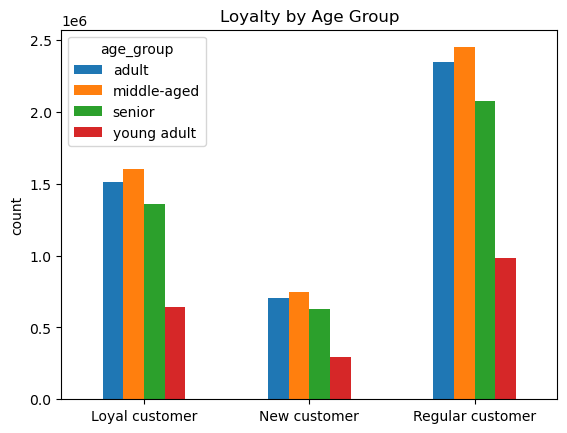

In [48]:
# bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [49]:
# Export the chart
loyalty_age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_age_group_bar.png'))

#### Spending vs Age group:

In [50]:
# Crosstab spending with age group
spending_age_cross = pd.crosstab(df_excluded['spender_flag'], df_excluded['age_group'], dropna = False)
spending_age_cross

age_group,adult,middle-aged,senior,young adult
spender_flag,,,,
High_spender,130181,141554,115945,55207
Low_spender,4434569,4652595,3947629,1864607


(array([0, 1]), [Text(0, 0, 'High_spender'), Text(1, 0, 'Low_spender')])

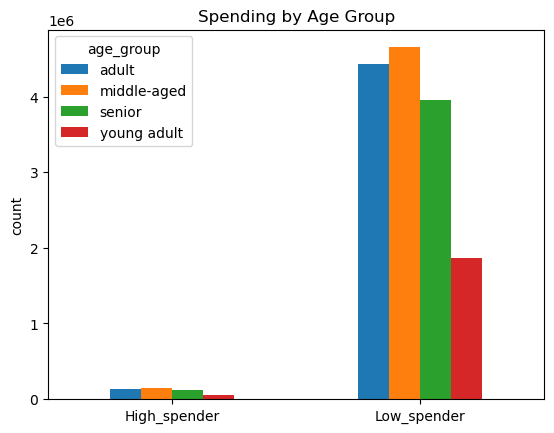

In [51]:
# bar chart
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [52]:
# Export the chart
spending_age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'spending_age_group_bar.png'))

#### Redo regional spending with low activity customers excluded:

In [53]:
df_excluded.loc[df_excluded['state'] == 'Pennsylvania', 'region'] = 'Northeast'

In [57]:
# Crosstab Region to spending flag
region_spending_cross = pd.crosstab(df_excluded['region'], df_excluded['spender_flag'], dropna = False)

In [59]:
region_spending_cross

spender_flag,High_spender,Low_spender
region,,
Midwest,104227,3491532
Northeast,59335,2052093
South,144606,4963427
West,116955,3811326
NaN,17764,581022


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West'),
  Text(4, 0, 'nan')])

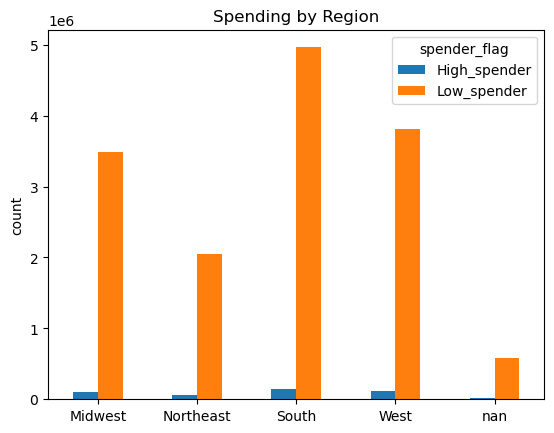

In [58]:
# bar chart
region_spending_bar = region_spending_cross.plot.bar()
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [60]:
# Export the chart
region_spending_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_spending_bar.png'))

#### Orders by Department:

In [61]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [62]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
df_excluded.drop(columns = ['_merge','Unnamed: 0'])

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,age,date_joined,n_dependants,marital_status,income,region,activity_flag,income_group,age_group,dependants_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,Midwest,high-activity customer,low-income,senior,has dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,Midwest,high-activity customer,low-income,senior,has dependants
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,66,6/16/2018,2,married,158302,Northeast,high-activity customer,high-income,senior,has dependants
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,51,1/4/2019,2,married,57797,West,high-activity customer,middle-income,middle-aged,has dependants
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,20,5/8/2019,3,living with parents and siblings,34171,South,high-activity customer,low-income,young adult,has dependants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16063389,25005,Organic Green Lentils,63,9,1.5,2797671,122848,98,3,13,...,25,5/18/2017,3,married,90541,Northeast,high-activity customer,middle-income,young adult,has dependants
16063390,25005,Organic Green Lentils,63,9,1.5,1657843,122852,7,0,10,...,78,7/21/2017,3,married,154169,South,high-activity customer,high-income,senior,has dependants
16063391,25005,Organic Green Lentils,63,9,1.5,1253504,122883,51,5,23,...,37,11/22/2018,0,single,64808,Northeast,high-activity customer,middle-income,adult,no dependants
16063392,25005,Organic Green Lentils,63,9,1.5,2342617,122952,8,6,16,...,33,2/28/2018,1,married,91383,Midwest,high-activity customer,middle-income,adult,has dependants


In [103]:
dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [106]:
df_final_merged = df_excluded.merge(dept, on='department_id', indicator='created')

In [107]:
# Exporting new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'Data','Prepared Data','orders_products_customers_departments.pkl'))

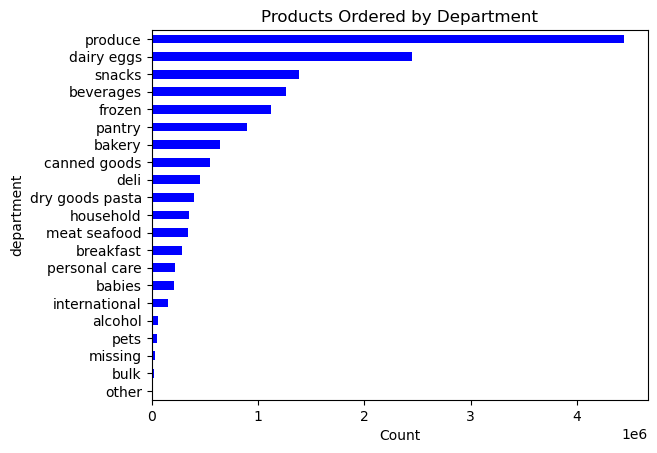

In [108]:
# bar chart frequency of orders vs department
depts_bar = df_final_merged['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')

In [109]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'depts_bar.png'))

#### Age vs Department:

In [110]:
# crosstab age group vs department
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,18311,61948,190175,370198,85922,7743,162562,730786,136165,119855,...,105161,44919,100079,8986,3702,264978,65216,14780,1327662,413124
middle-aged,19718,64698,198723,402125,90024,7977,171697,760304,142335,125404,...,110480,46845,106193,9782,3924,279722,70207,15646,1382065,432049
senior,15636,54106,169486,338091,74894,7025,144654,648017,119846,106045,...,94140,39605,91310,8014,3420,236454,57559,13971,1177088,363994
young adult,8297,26302,80768,157797,36633,3304,68387,306692,55360,50672,...,44562,18932,42111,3999,1726,112025,27723,6873,554492,173651


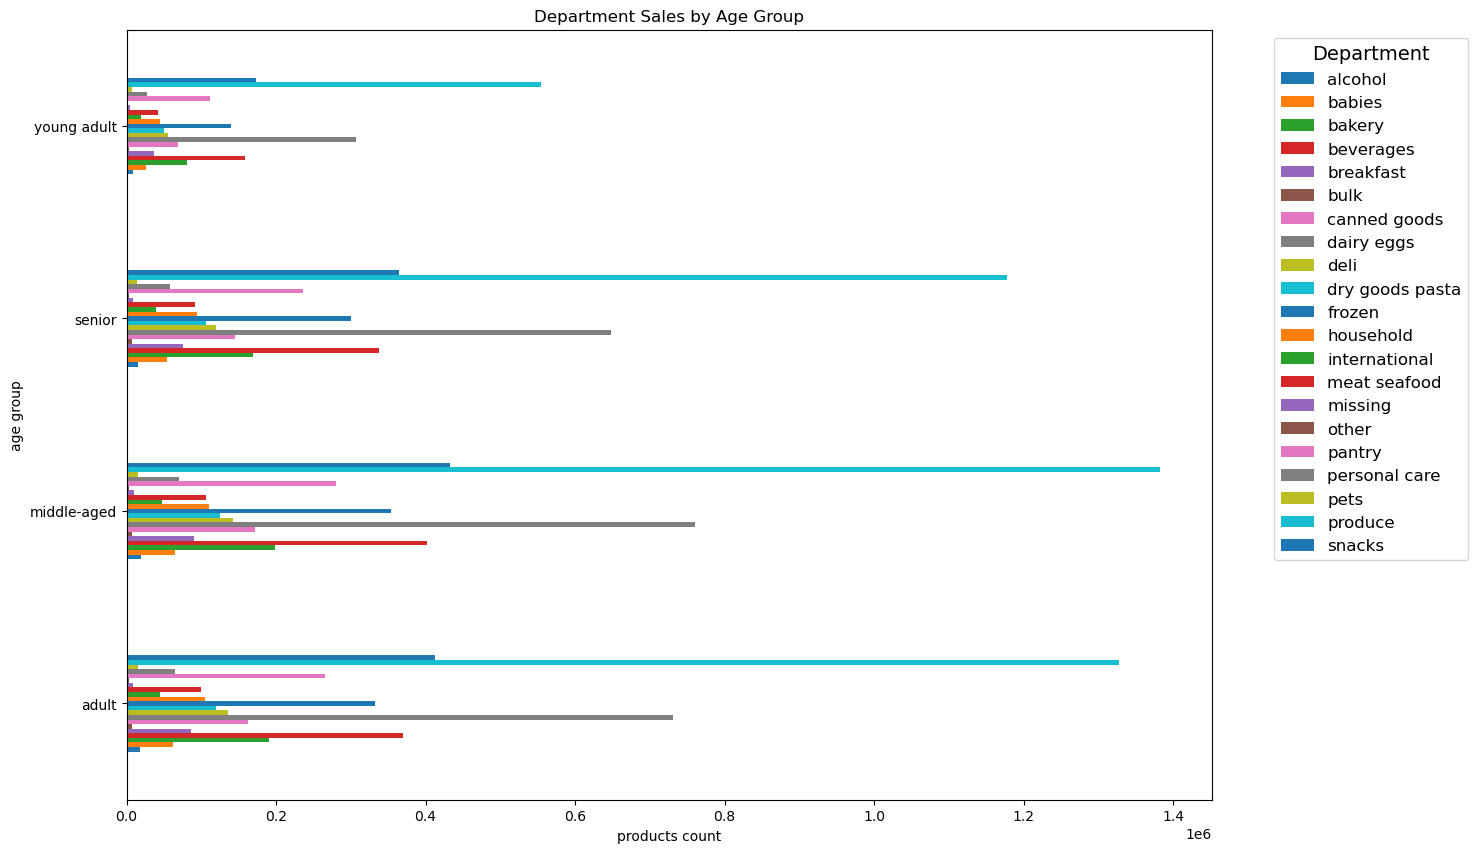

In [111]:
# bar chart
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [112]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_depts_bar.png'))

#### Income vs Department:

In [113]:
# crosstab income group vs department
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,10302,26862,84597,151876,35336,2800,71626,312985,56329,51867,...,45783,19417,45637,3842,1688,116277,27780,6996,553341,154021
low-income,9658,21903,83652,245510,51069,4997,61347,323069,67367,46335,...,55721,17781,26710,4539,1678,111787,32355,6505,575837,329462
middle-income,42002,158289,470903,870825,201068,18252,414327,1809745,330010,303774,...,252839,113103,267346,22400,9406,665115,160570,37769,3312129,899335


In [114]:
# crosstab income group vs department
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,10302,26862,84597,151876,35336,2800,71626,312985,56329,51867,...,45783,19417,45637,3842,1688,116277,27780,6996,553341,154021
low-income,9658,21903,83652,245510,51069,4997,61347,323069,67367,46335,...,55721,17781,26710,4539,1678,111787,32355,6505,575837,329462
middle-income,42002,158289,470903,870825,201068,18252,414327,1809745,330010,303774,...,252839,113103,267346,22400,9406,665115,160570,37769,3312129,899335


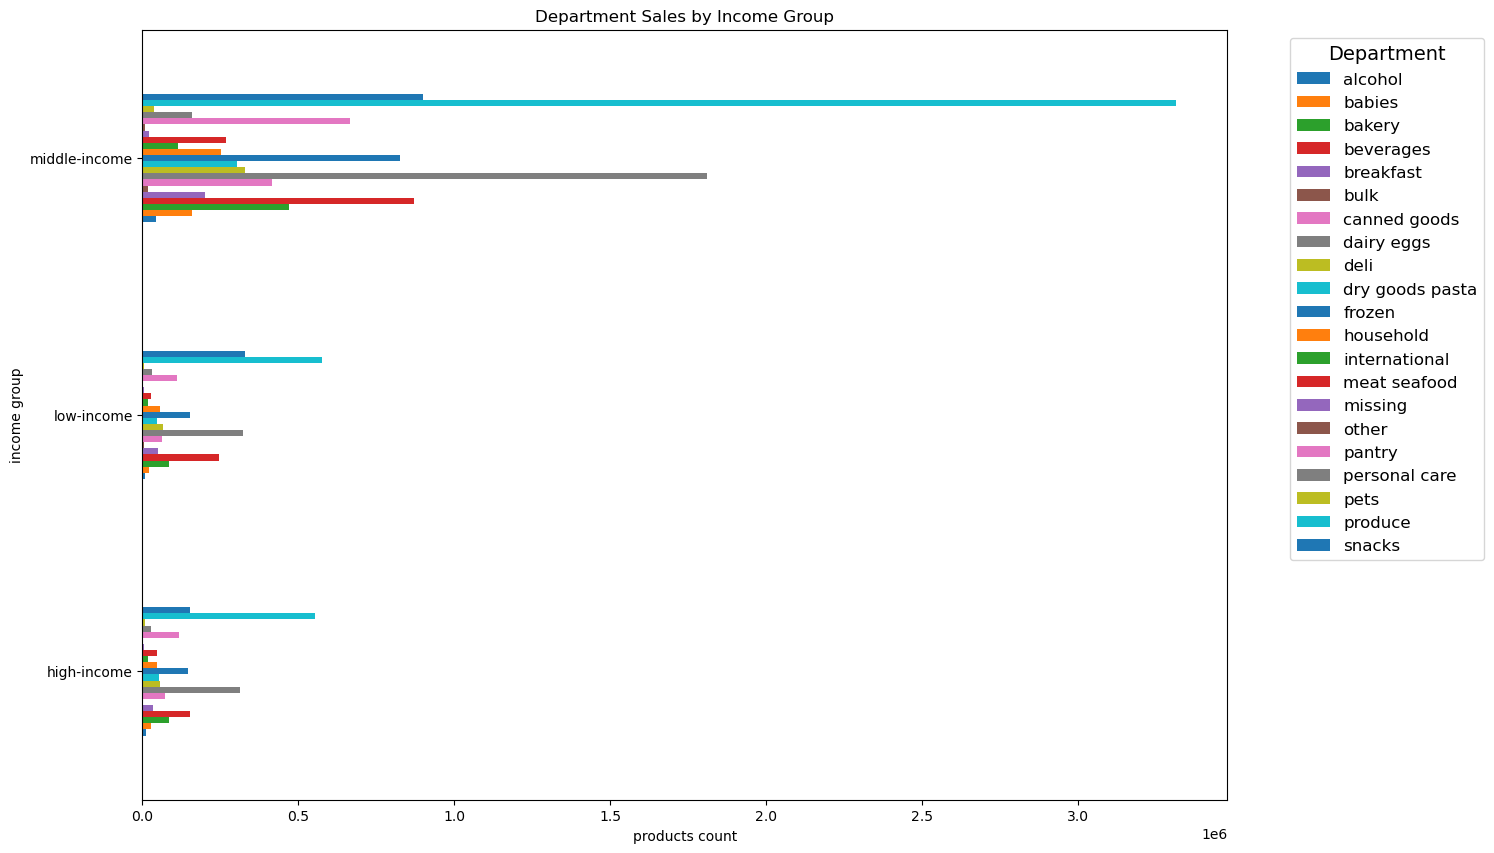

In [115]:
# bar chart
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [116]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_depts_bar.png'))

### 6. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure:

In [ ]:
customer_profile = df_final_merged.groupby([
    'user_id', 'gender', 'state', 'region', 'n_dependants', 'marital_status', 
    'age_group', 'order_number', 'order_dow', 'order_hour_of_day', 
    'loyalty_flag', 'Customer_frequency', 'dependants_flag', 
    'income_group', 'spender_flag'
])['prices'].sum().reset_index()

In [ ]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_final_merged.groupby(['user_id', 'gender', 'state', 'region', 'n_dependants', 'fam_status', 'age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'customer_frequency', 'dependants_flag', 'income_group', 'spender_flag'])['prices'].sum().reset_index()

In [122]:
customer_profile.head()

,user_id,gender,state,region,n_dependants,marital_status,age_group,order_number,order_dow,order_hour_of_day,loyalty_flag,Customer_frequency,dependants_flag,income_group,spender_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,20.0,has dependants,low-income,Low_spender,25.9
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,20.0,has dependants,low-income,Low_spender,30.7
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,20.0,has dependants,low-income,Low_spender,16.4
3,1,Female,Alabama,South,3,married,adult,4,4,7,New customer,20.0,has dependants,low-income,Low_spender,16.4
4,1,Female,Alabama,South,3,married,adult,5,4,15,New customer,20.0,has dependants,low-income,Low_spender,43.4


In [123]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [124]:
customer_agg

order_number                prices                  
                 max min       mean    max   min        mean
user_id                                                     
1                 10   1   5.500000   43.4  16.4   22.280000
10                 5   1   3.000000  237.6  13.6  116.640000
100                5   2   3.500000   38.8   6.9   21.525000
1000               7   1   4.000000   39.9  14.5   23.871429
10000             72   1  36.605634  166.1   2.3   58.105634
...              ...  ..        ...    ...   ...         ...
99994             11   1   6.000000   96.9  56.7   73.663636
99995              5   2   3.500000   83.4  16.8   48.575000
99996             12   1   6.272727   71.7   5.0   37.636364
99998              5   1   3.000000   37.2   9.3   20.960000
99999             34   1  18.187500   81.9   5.3   33.906250

[154903 rows x 6 columns]

In [125]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = df_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [126]:
freq_agg

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.432432                   30.0   0.0  19.270270
10                 5   1   3.307692                   30.0   7.0  20.661538
100                5   2   3.700000                   30.0  18.0  26.400000
1000               7   1   4.071429                   30.0   5.0  11.500000
10000             72   1  36.700952                   17.0   0.0   5.053333
...              ...  ..        ...                    ...   ...        ...
99994             11   1   6.247059                   30.0   5.0  17.870588
99995              5   2   3.592593                   30.0   6.0  15.777778
99996             12   1   6.296296                   30.0   7.0  21.259259
99998              5   1   3.300000                   12.0   7.0   8.100000
99999             34   1  16.253012                   24.0   1.0   7.975904

[161180 rows x 6 columns]

#### 7. Compare customer profiles with regions and departments:

#### Region vs Department:

In [127]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df_final_merged['region'], df_final_merged['department'], dropna = False)
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,14646,48766,149201,295401,66603,6189,127768,575004,105134,94612,...,83975,35621,79065,7499,3106,210154,52101,12068,1043273,320676
Northeast,8308,28444,87914,181736,40196,3514,74700,335741,63562,54010,...,48718,20638,46186,4272,1803,122711,30523,7302,606952,192248
South,20493,70429,211049,422106,95573,8667,182054,815324,151857,133648,...,117491,49643,113279,10427,4247,296308,73907,16182,1477959,459612
West,16141,51676,165910,320551,74093,6808,141656,623846,115549,103975,...,89955,38670,87480,7424,3167,229672,55741,13348,1139098,355884
NaN,2374,7739,25078,48417,11008,871,21122,95884,17604,15731,...,14204,5729,13683,1159,449,34334,8433,2370,174025,54398


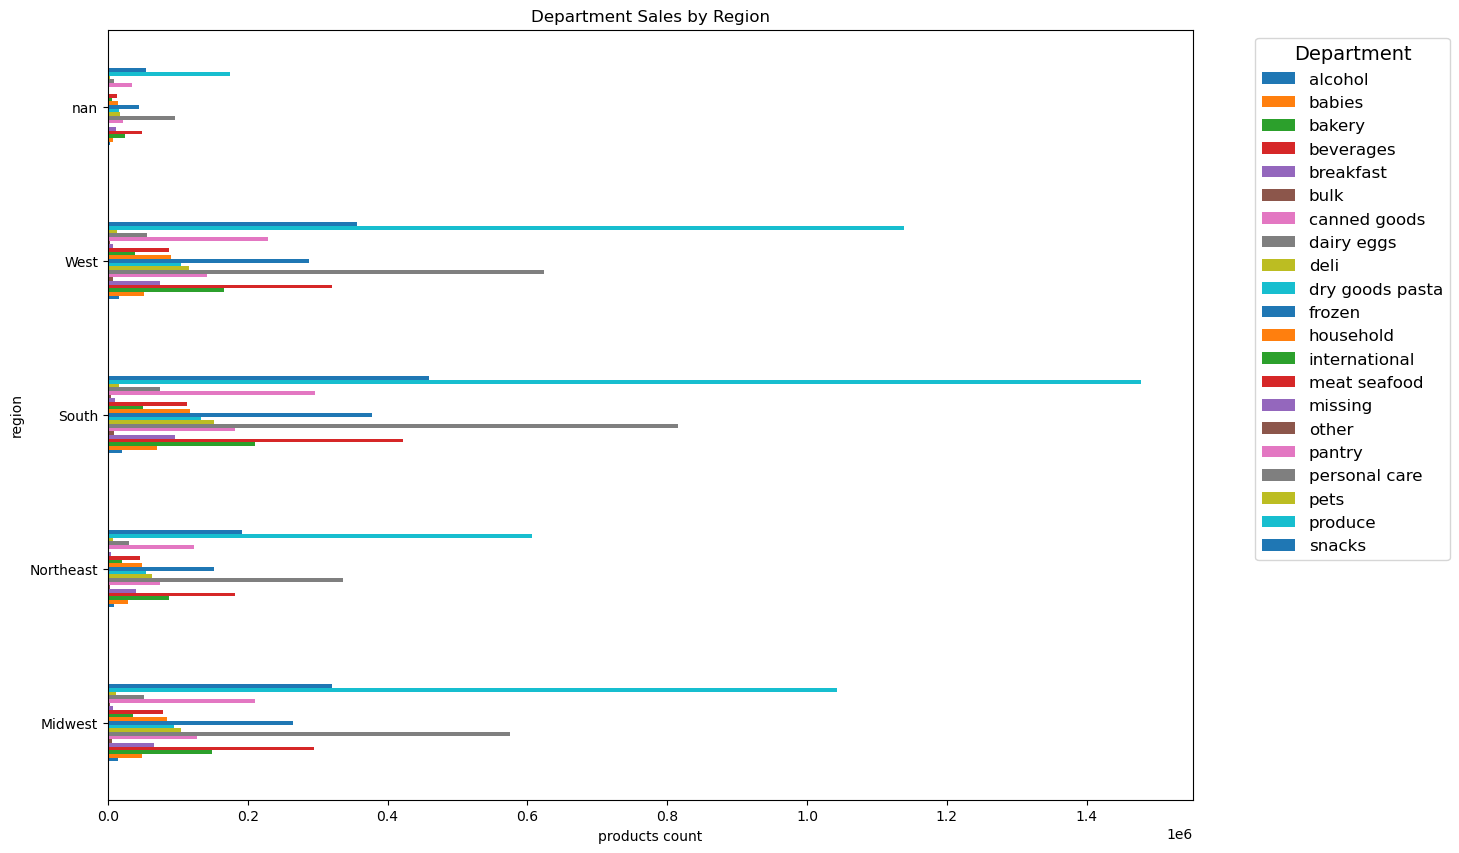

In [128]:
# bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [129]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_depts_bar.png'))

In [130]:
# import orders_products_customers
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

Text(0.5, 0, '')

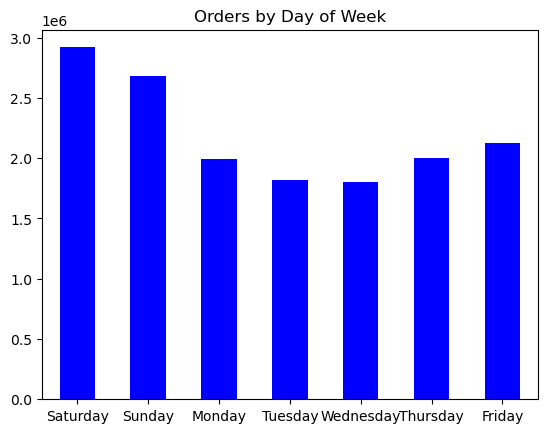

In [132]:
orders_dow_bar = df['order_dow'].value_counts().sort_index().plot.bar(color='blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [133]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'orders_dow_bar.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

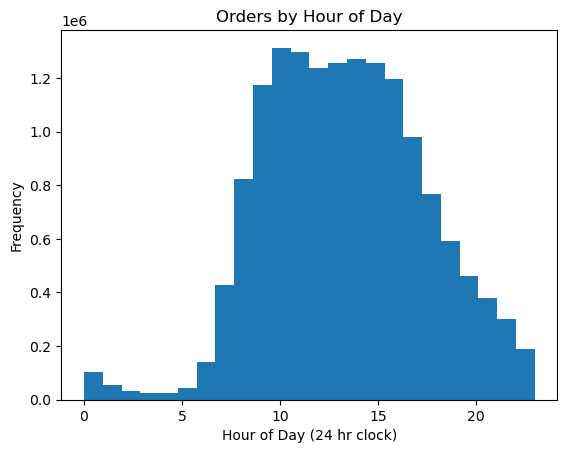

In [134]:
# histogram of hours of the day
hod_hist=df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [135]:
# Export histogram
hod_hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hod_hist.png'))

In [136]:
# Crosstab loyalty with age group
loyalty_income_cross = pd.crosstab(df['loyalty_flag'], df['income_group'], dropna = False)
loyalty_income_cross

income_group,high-income,low-income,middle-income
loyalty_flag,,,
Loyal customer,651903,692092,3768643
New customer,283967,399841,1687869
Regular customer,990645,1138586,5728741


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

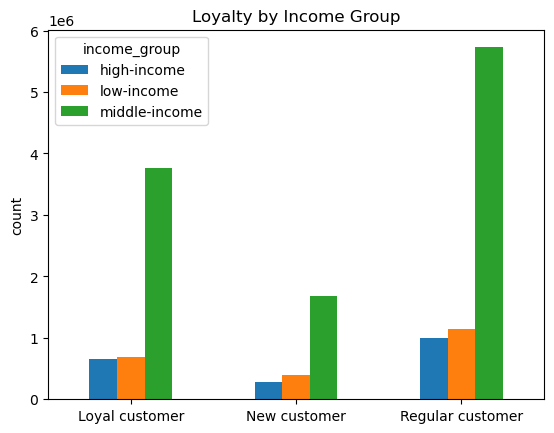

In [137]:
# bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [138]:
# Export the chart
loyalty_income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [139]:
# Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(df['loyalty_flag'], df['spender_flag'], dropna = False)
loyalty_spender_cross

spender_flag,High_spender,Low_spender
loyalty_flag,,
Loyal customer,135612,4977026
New customer,83677,2288000
Regular customer,223598,7634374


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

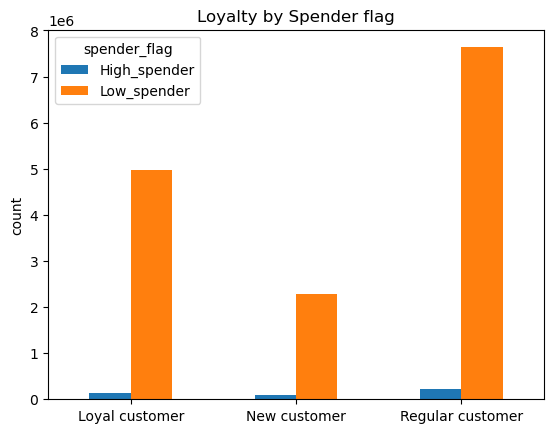

In [140]:
# bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [141]:
# Export the chart
loyalty_spender_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_spender_bar.png'))

In [143]:
loyalty_fam_cross = pd.crosstab(df['loyalty_flag'], df['marital_status'], dropna=False)
loyalty_fam_cross

marital_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,439650,244486,3579698,848804
New customer,198534,109105,1668749,395289
Regular customer,671630,380484,5523711,1282147


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

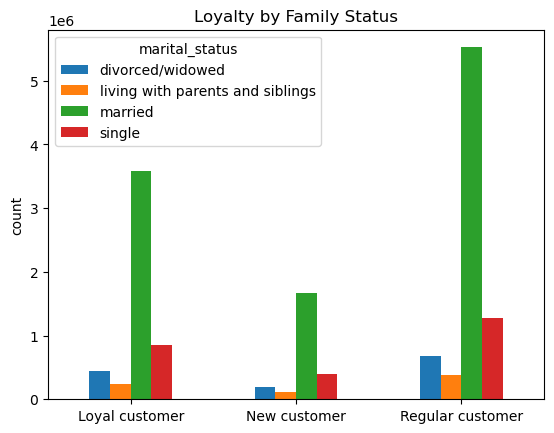

In [144]:
# bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [152]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_fam_bar.png'))

In [153]:
# Crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(df['loyalty_flag'], df['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag,has dependants,no dependants
loyalty_flag,,
Loyal customer,3824184,1288454
New customer,1777854,593823
Regular customer,5904195,1953777


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

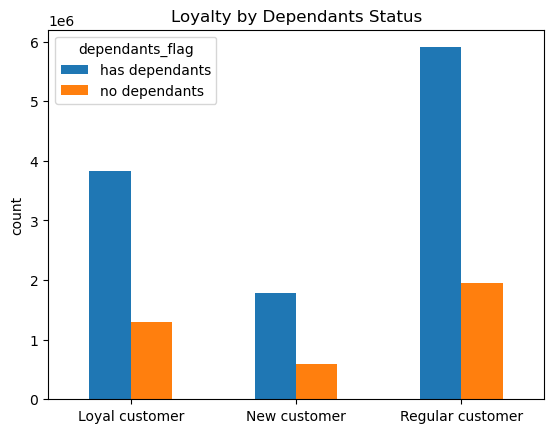

In [154]:
# bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [155]:
fam_status = df['marital_status'].value_counts(dropna=False)
fam_status

marital_status
married                             10772158
single                               2526240
divorced/widowed                     1309814
living with parents and siblings      734075
Name: count, dtype: int64

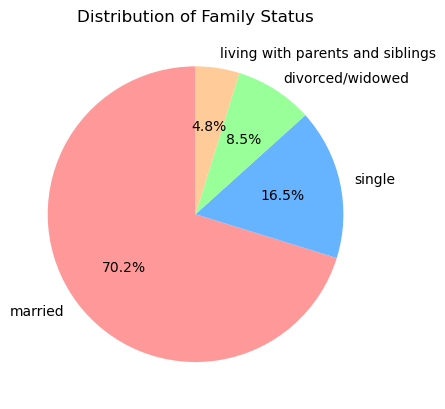

In [150]:
# Pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [151]:
# Export the chart
fam_status_distribution_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'fam_status_bar.png'))